In [1]:
import pandas as pd
import seaborn as sns
import IonPy
from utils_.metrics import load_metrics, clean_up_results
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set_style("darkgrid")

In [2]:
df_results, broken_dirs = load_metrics("/u/vbutoi/victor_space/scratch/dec_results/prompt_eng")

  0%|          | 0/14 [00:00<?, ?it/s]

In [3]:
# Clean up the runs which crashed and thus don't have a pkl file.
clean_up_results(broken_dirs)

No broken directories found.


In [4]:
len(df_results)

280000

In [5]:
df_results.head()

,id,class,benchmark,accuracy,mid_accuracy,image,prompt,prompt_id,result,correct_option,model
0,0,vga,ARO_VGA,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the crouched man. ...,3,A,A,flan_t5
0,0,vga,ARO_VGA,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the crouched man. ...,3,A,A,flan_t5
1,1,vga,ARO_VGA,True,1.000000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the gray floor. Op...,3,A,A,flan_t5
2,2,vga,ARO_VGA,False,0.666667,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the metal floor. O...,3,B,A,flan_t5
3,3,vga,ARO_VGA,True,0.750000,/u/vbutoi/victor_space/data/visual_genome/imag...,Option A: the open door and the long sleeved s...,3,A,A,flan_t5


In [6]:
# Specify the column names for which you want to find unique values
varying_fields = ["benchmark", "prompt"]

# Find unique values for the specified columns
unique_values = {}
for column in df_results.keys():
    try:
        unique_col_vals = df_results[column].unique()
        if len(unique_col_vals) > 1 and column in varying_fields:
            unique_values[column] = unique_col_vals
    except Exception as e:
        continue

# Print the unique values for each column, if that column has more than one value.
for column, values in unique_values.items():
    print(f"Unique values for {column}: {values}")

Unique values for benchmark: ['ARO_VGA' 'ARO_VGR']
Unique values for prompt: ['Option A: the open door and the crouched man. Option B: the crouched door and the open man. Described from the viewpoint of looking at the image, which option is correct, A or B?'
 'Option A: the open door and the gray floor. Option B: the gray door and the open floor. Described from the viewpoint of looking at the image, which option is correct, A or B?'
 'Option A: the open door and the metal floor. Option B: the metal door and the open floor. Described from the viewpoint of looking at the image, which option is correct, A or B?'
 ...
 'Option A: the soft elephant and the happy jacket. Option B: the happy elephant and the soft jacket. Looking at the image, which option is correct, A or B?'
 'Option A: the black elephant and the happy jacket. Option B: the happy elephant and the black jacket. Looking at the image, which option is correct, A or B?'
 'Option A: the drinking elephant and the soft jacket. Optio

In [7]:
# Create a new column by concatenating values from 'Column2' and 'Column3'
eval_columns = ['benchmark', 'prompt_id']

def combine_columns(row, columns):
    values = [f"{column}:{row[column]}" for column in columns]
    return '_'.join(values)
    
df_results['eval_regime'] = df_results.apply(lambda row: combine_columns(row, eval_columns), axis=1)

In [8]:
df_results['eval_regime']

0      benchmark:ARO_VGA_prompt_id:3
0      benchmark:ARO_VGA_prompt_id:3
1      benchmark:ARO_VGA_prompt_id:3
2      benchmark:ARO_VGA_prompt_id:3
3      benchmark:ARO_VGA_prompt_id:3
                   ...              
975    benchmark:ARO_VGA_prompt_id:5
976    benchmark:ARO_VGA_prompt_id:5
977    benchmark:ARO_VGA_prompt_id:5
978    benchmark:ARO_VGA_prompt_id:5
979    benchmark:ARO_VGA_prompt_id:5
Name: eval_regime, Length: 280000, dtype: object

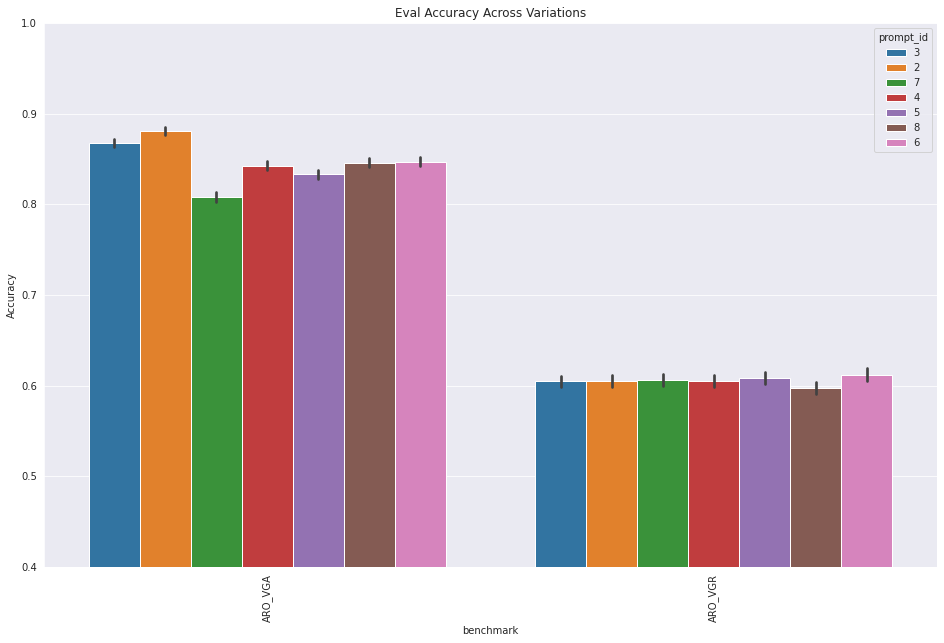

In [9]:
# Set a larger figure size
plt.figure(figsize=(16, 10))

sns.barplot(x='benchmark', 
            y='accuracy',
            data=df_results,
            hue='prompt_id')

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Eval Accuracy Across Variations')

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=90)
plt.ylim([0.4, 1])
# Show the plot
plt.show()

In [10]:
df_results.groupby(["eval_regime", "benchmark"])['accuracy'].mean().reset_index()

,eval_regime,benchmark,accuracy
0,benchmark:ARO_VGA_prompt_id:2,ARO_VGA,0.88060
1,benchmark:ARO_VGA_prompt_id:3,ARO_VGA,0.86810
2,benchmark:ARO_VGA_prompt_id:4,ARO_VGA,0.84260
3,benchmark:ARO_VGA_prompt_id:5,ARO_VGA,0.83340
4,benchmark:ARO_VGA_prompt_id:6,ARO_VGA,0.84715
5,benchmark:ARO_VGA_prompt_id:7,ARO_VGA,0.80815
6,benchmark:ARO_VGA_prompt_id:8,ARO_VGA,0.84610
7,benchmark:ARO_VGR_prompt_id:2,ARO_VGR,0.60475
8,benchmark:ARO_VGR_prompt_id:3,ARO_VGR,0.60460
9,benchmark:ARO_VGR_prompt_id:4,ARO_VGR,0.60510
